# One step of learning

In [1]:
import torch

In [2]:
x = torch.rand(3)
y_true = torch.tensor(data=[1.])
x

tensor([0.6927, 0.7695, 0.7561])

In [3]:
# Create X and b
w = torch.randn(size=(3, 1), requires_grad=True)
# Requires_grad means that we will count gradients for this tensors
b = torch.zeros(1, requires_grad=True)
w

tensor([[ 0.4899],
        [-0.2397],
        [-0.6416]], requires_grad=True)

In [4]:
# Calculate sigmoid for sample
torch.sigmoid(input=torch.tensor(data=[1, 0, -1]))

tensor([0.7311, 0.5000, 0.2689])

In [5]:
# Make prediction
y_pred = torch.sigmoid(x @ w + b)
y_pred

tensor([0.4182], grad_fn=<SigmoidBackward0>)

In [6]:
# Calculate loss function
loss = ((y_true - y_pred) ** 2).sum()
loss

tensor(0.3385, grad_fn=<SumBackward0>)

In [7]:
# Before .backward()
print(w.grad)
print(b.grad)

None
None


In [8]:
# Calculates gradient of loss
loss.backward()

print(w.grad)  # dl/dw
print()
print(b.grad)  # dl/db

tensor([[-0.1961],
        [-0.2179],
        [-0.2141]])

tensor([-0.2831])


In [9]:
# Make step of gradient descent
print(f'W before: {w}')
print(f'b before: {b}')
print()

with torch.no_grad():  # Disable gradient calculations
    w -= w.grad
    b -= b.grad  # -= doesn't change current variable, but creates copy
    
print(f'W after: {w}')
print(f'b after: {b}')

W before: tensor([[ 0.4899],
        [-0.2397],
        [-0.6416]], requires_grad=True)
b before: tensor([0.], requires_grad=True)

W after: tensor([[ 0.6860],
        [-0.0218],
        [-0.4275]], requires_grad=True)
b after: tensor([0.2831], requires_grad=True)


In [10]:
# In PyTorch we have to make gradients empty manually!
w.grad.zero_()  # Inplace
b.grad.zero_()

tensor([0.])

# Activation and Loss functions

In [11]:
vector = torch.tensor([1., -0.5, 3., -2.])
print(
    f'Sigmoid:\n{torch.sigmoid(vector)}',
    f'Tanh:\n{torch.tanh(vector)}',
    f'ReLU:\n{torch.relu(vector)}',
    f'Softmax:\n{torch.softmax(vector, 0)}',
    f'Log_Softmax:\n{torch.log_softmax(vector, 0)}',
    sep='\n\n'
)

Sigmoid:
tensor([0.7311, 0.3775, 0.9526, 0.1192])

Tanh:
tensor([ 0.7616, -0.4621,  0.9951, -0.9640])

ReLU:
tensor([1., 0., 3., 0.])

Softmax:
tensor([0.1154, 0.0258, 0.8530, 0.0057])

Log_Softmax:
tensor([-2.1589, -3.6589, -0.1589, -5.1589])


In [12]:
# Loss functions

# MSE
y_true_reg = torch.tensor([1., -1., 2.])
y_pred_reg = torch.tensor([0.8, -0.2, 2.5])

# Cross-entropy
y_pred_clf_scores = torch.tensor([
    [10., 1., -2.5],
    [8., 2., 10.], 
    [0., 28., 1.]
])
y_true_clf_probs = torch.tensor([
    [1., 0., 0.],
    [0., 0., 1.],
    [0., 1., 0.]
])

# Negative loss likelihood
y_pred_clf_log_probs = torch.tensor([
    [0.8, 0.1, 0.1],
    [0.4, 0.1, 0.5],
    [0., 0.98, 0.02]
])
y_true_clf_class = torch.tensor([0, 2, 1])



# Function-instances of the classes
mse_loss_func = torch.nn.MSELoss()
ce_loss_func = torch.nn.CrossEntropyLoss()
nll_loss_func = torch.nn.NLLLoss()

print(
    f'MSE: {mse_loss_func(y_pred_reg, y_true_reg)}',
    f'CE: {ce_loss_func(y_pred_clf_scores, y_true_clf_probs)}',
    f'NLL: {nll_loss_func(y_pred_clf_log_probs, y_true_clf_class)}',
    sep='\n\n'
)

MSE: 0.3100000321865082

CE: 0.042450178414583206

NLL: -0.7599999904632568


# Neural network training

In [13]:
class MyLinear(torch.nn.Module):
    def __init__(self, in_features, out_features):
        """
        Initialize layer of NN
        """
        super().__init__()
        self.weight = torch.nn.Parameter(torch.randn(in_features, out_features))
        self.bias = torch.nn.Parameter(torch.zeros(out_features))
        
    def forward(self, input):
        """
        Gets data in input and Returns preprocessed data
        """
        return (input @ self.weight) + self.bias

In [14]:
linear_layer = torch.nn.Linear(in_features=2, out_features=3)
x = torch.rand(size=(2,))
linear_layer(x)

tensor([ 0.5831, -0.8083, -0.5929], grad_fn=<AddBackward0>)

In [15]:
n = 5  # Intput neurons
k = 2  # Output neurons

batch_size = 10  # How many examples do we calculate gradients at a time

x = torch.rand(batch_size, n)
y_true = torch.randint

# Two layers network
hidden_size = 5  # Shape of hidden layer
linear_layer_1 = torch.nn.Linear(in_features=n, out_features=hidden_size)
activation_1 = torch.nn.Tanh()
linear_layer_2 = torch.nn.Linear(in_features=hidden_size, out_features=k)
activation_2 = torch.nn.LogSoftmax(dim=1)  # Dim specifies on dimension

# Make prediction without wrapper

# y_pred = activation_2(
#     linear_layer_2(
#         activation_1(
#             linear_layer_1(x)
#         )
#     )
# )

model = torch.nn.Sequential(
    linear_layer_1,
    activation_1,
    linear_layer_2, 
    activation_2
)

model(x)

tensor([[-0.6515, -0.7366],
        [-0.5858, -0.8134],
        [-0.7083, -0.6782],
        [-0.5583, -0.8491],
        [-0.5873, -0.8116],
        [-0.6778, -0.7087],
        [-0.5520, -0.8575],
        [-0.5438, -0.8687],
        [-0.6785, -0.7080],
        [-0.6071, -0.7873]], grad_fn=<LogSoftmaxBackward0>)

In [16]:
# Description of the model
model

Sequential(
  (0): Linear(in_features=5, out_features=5, bias=True)
  (1): Tanh()
  (2): Linear(in_features=5, out_features=2, bias=True)
  (3): LogSoftmax(dim=1)
)

In [17]:
# Beautiful view of Sequential
from collections import OrderedDict

model = torch.nn.Sequential(
    OrderedDict([
        ('linear_layer_1', torch.nn.Linear(n, hidden_size)),
        ('activation_1', torch.nn.Tanh()),
        ('linear_layer_2', torch.nn.Linear(hidden_size, k)),
        ('log_softmax', torch.nn.LogSoftmax(dim=1))
    ])
)

print(model(x), end='\n\n')
model

tensor([[-0.6198, -0.7723],
        [-0.5946, -0.8025],
        [-0.5787, -0.8224],
        [-0.6338, -0.7562],
        [-0.6119, -0.7816],
        [-0.5769, -0.8247],
        [-0.5391, -0.8754],
        [-0.5396, -0.8746],
        [-0.6764, -0.7102],
        [-0.5308, -0.8871]], grad_fn=<LogSoftmaxBackward0>)



Sequential(
  (linear_layer_1): Linear(in_features=5, out_features=5, bias=True)
  (activation_1): Tanh()
  (linear_layer_2): Linear(in_features=5, out_features=2, bias=True)
  (log_softmax): LogSoftmax(dim=1)
)

# Train model on real data

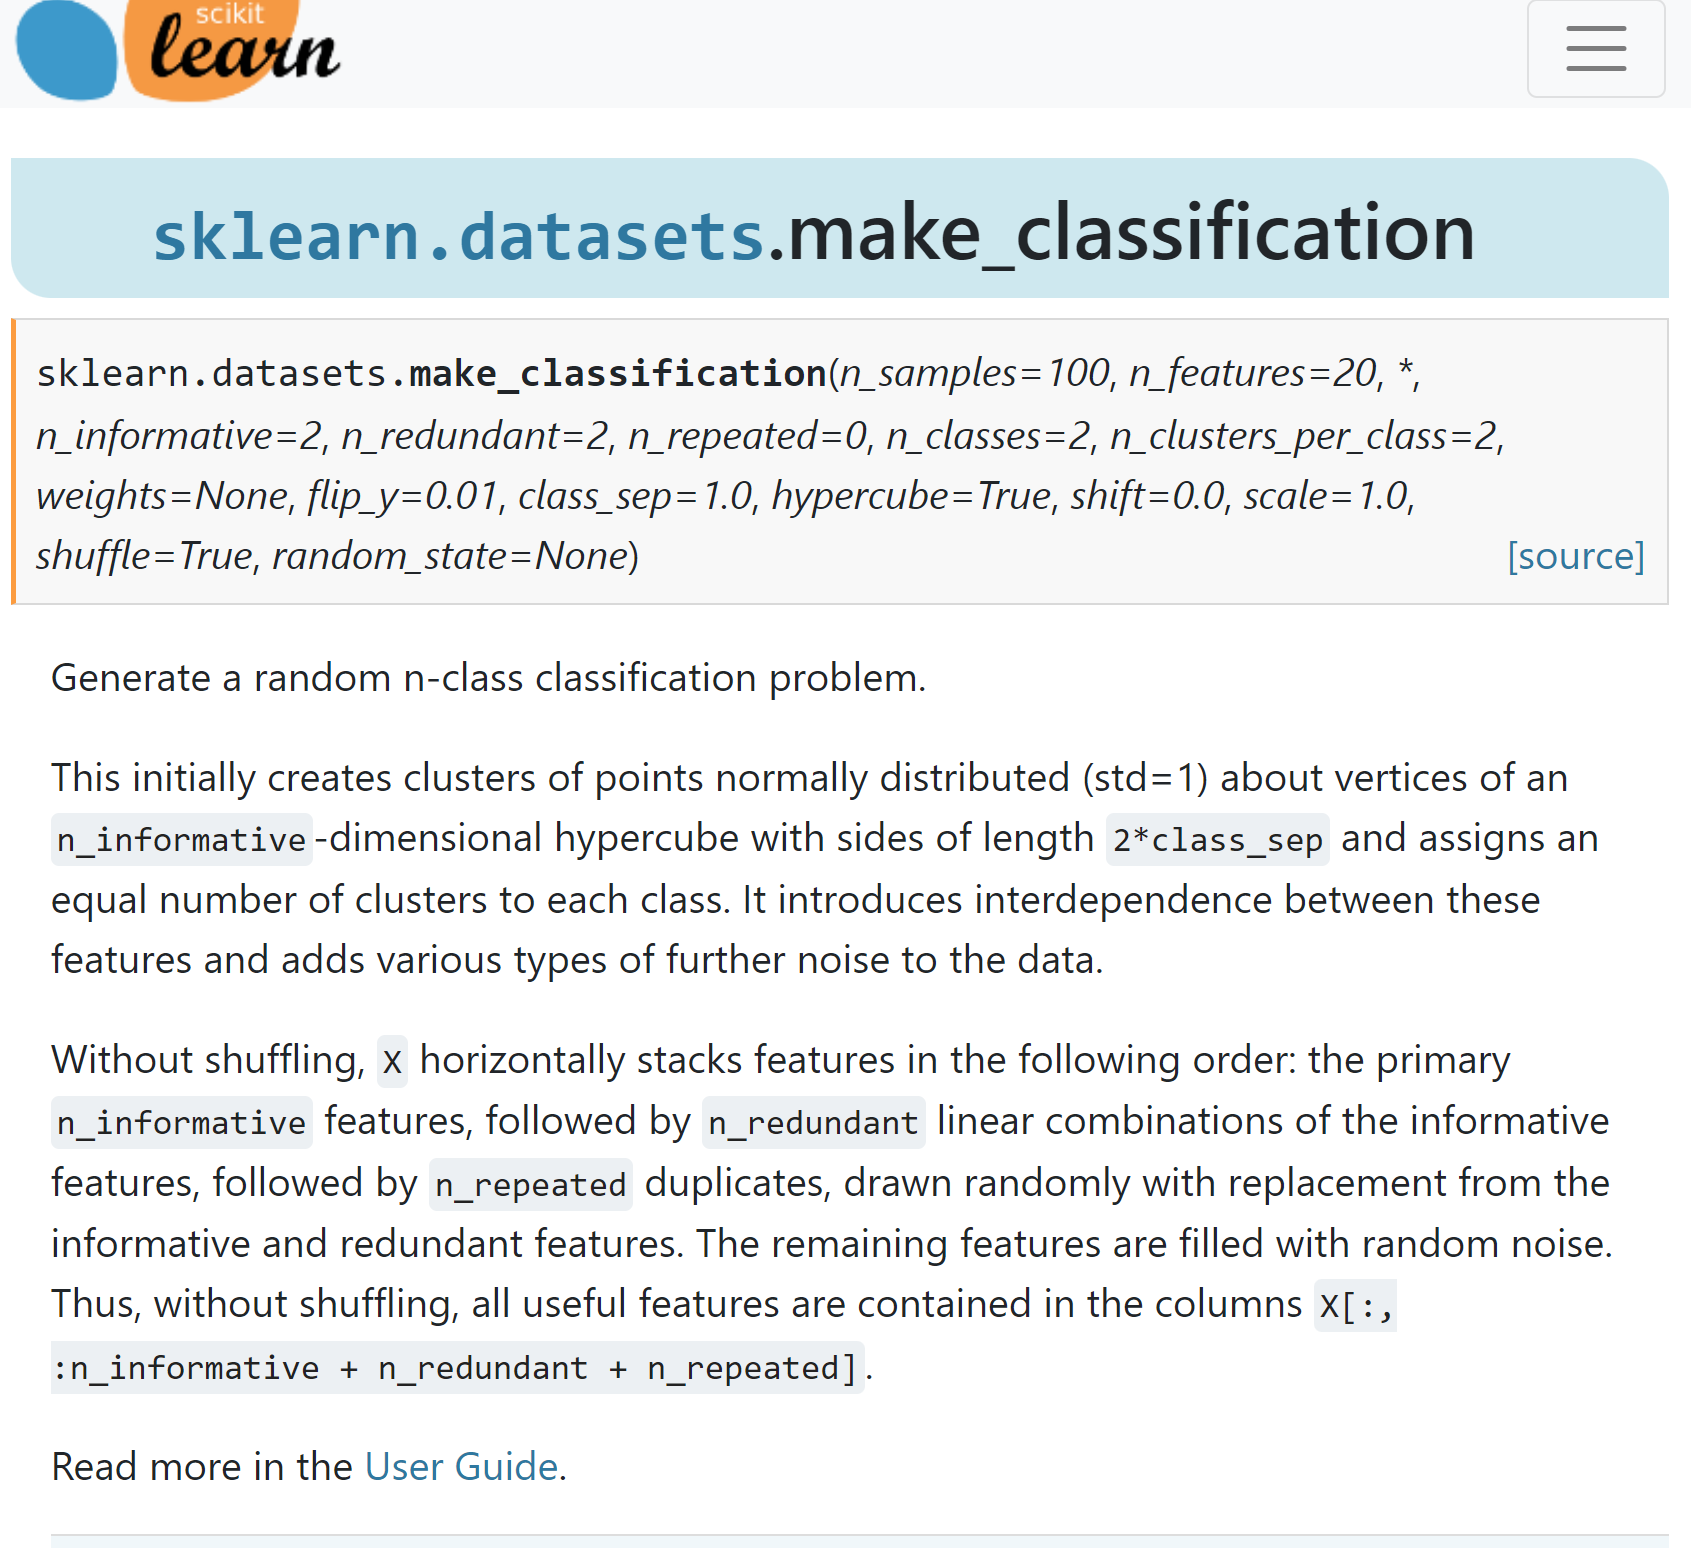

In [18]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_classes=2,
    
    n_informative=2,
    n_redundant=0,
    n_repeated=0
)

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

X.shape, y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [19]:
# 2 Classes
y.min(), y.max()

(tensor(0), tensor(1))

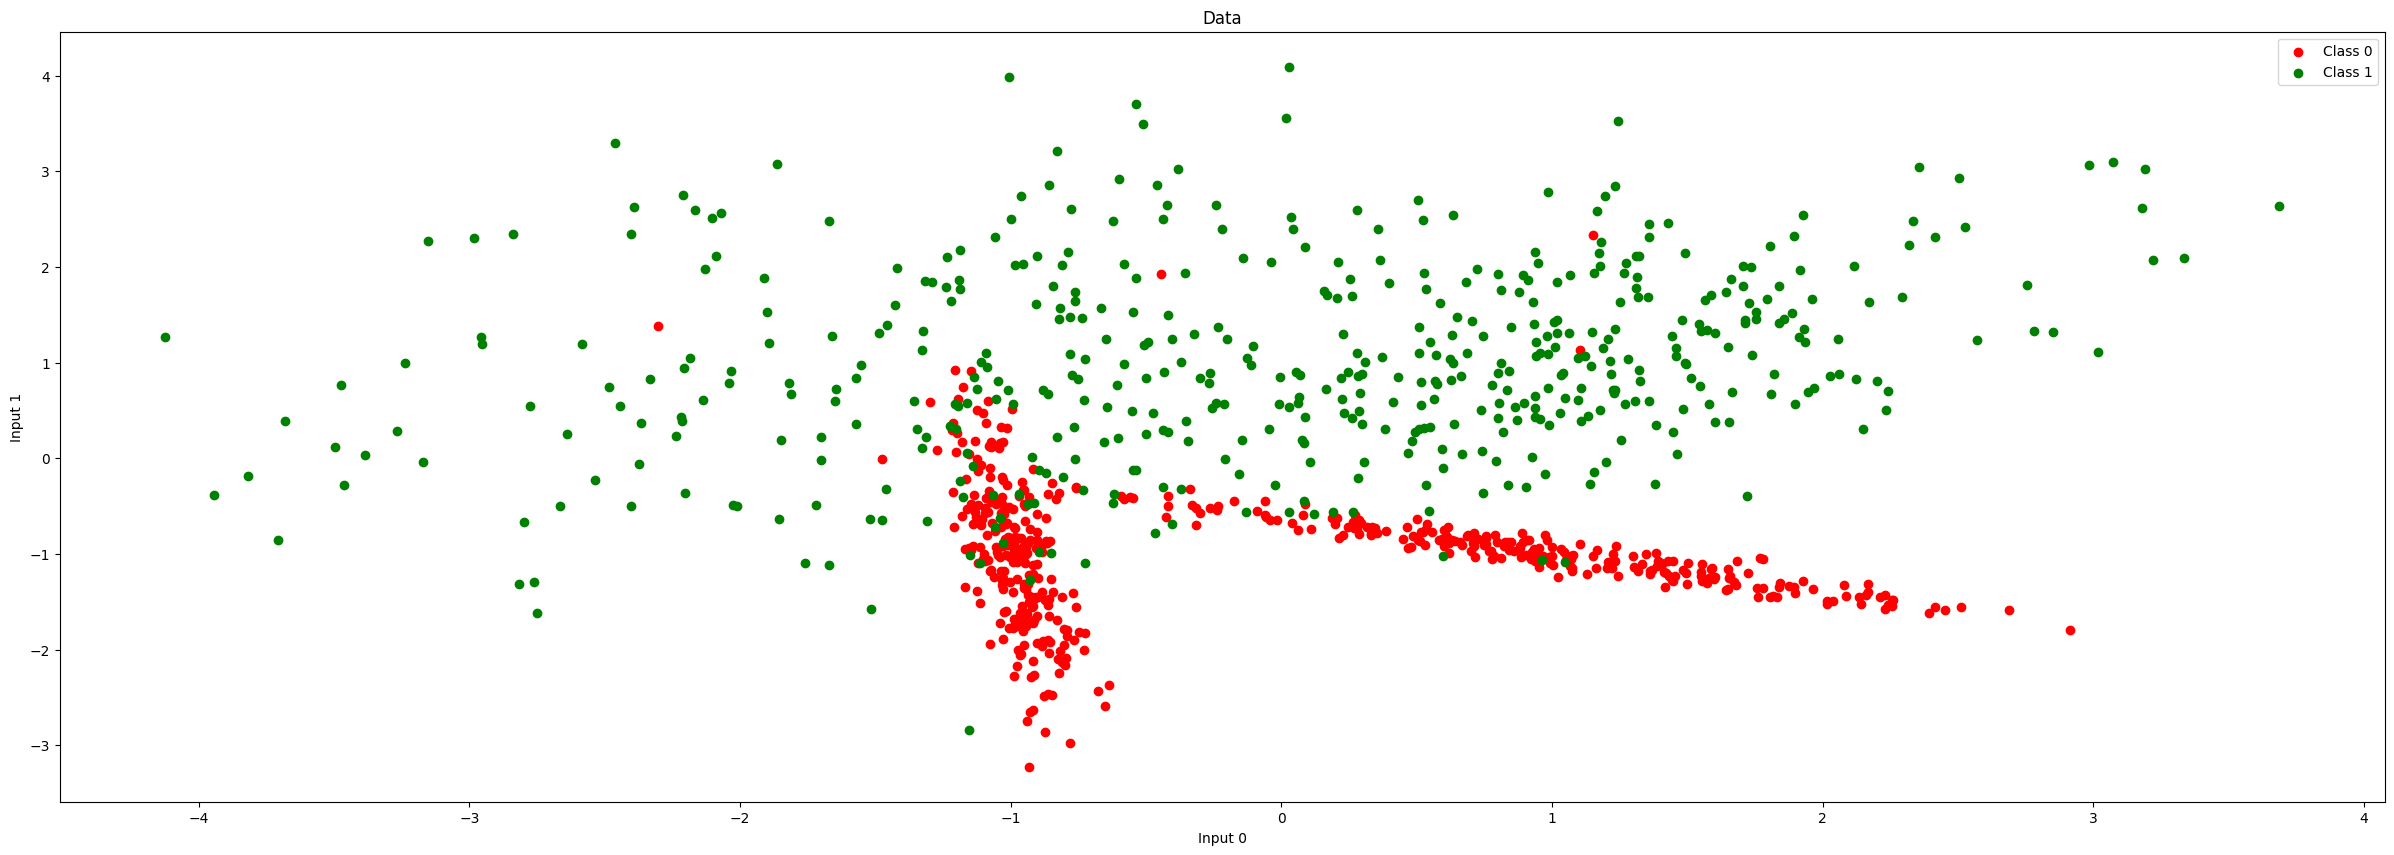

In [20]:
# Visualize the data
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30, 10))
colors = ['red', 'green']
for target in range(2):
    plt.scatter(X[y == target, 0], X[y == target, 1], label=f'Class {target}', c=colors[target])

plt.title('Data')
plt.xlabel('Input 0')
plt.ylabel('Input 1')
plt.legend()
plt.show();

In [21]:
# Make grid
xy_min, xy_max = -4, 4
grid_size = 120
grid = torch.linspace(xy_min, xy_max, grid_size, dtype=torch.float32)
grid_x_1, grid_x_2 = torch.meshgrid(grid, grid, indexing='ij')
grid = torch.stack([grid_x_1.reshape(-1), grid_x_2.reshape(-1)], dim=1)
print(grid.shape, grid.dtype)

torch.Size([14400, 2]) torch.float32


In [22]:
from collections import OrderedDict

model = torch.nn.Sequential(
    OrderedDict([
        ('linear_layer_1', torch.nn.Linear(2, 4)),
        ('activation_1', torch.nn.ReLU()),
        ('linear_layer_2', torch.nn.Linear(4, 2)),
        ('log_softmax', torch.nn.LogSoftmax(dim=1))
    ])
)

model

Sequential(
  (linear_layer_1): Linear(in_features=2, out_features=4, bias=True)
  (activation_1): ReLU()
  (linear_layer_2): Linear(in_features=4, out_features=2, bias=True)
  (log_softmax): LogSoftmax(dim=1)
)

In [23]:
# Optimizer - Thing that automatically make gradient descent
optimizer = torch.optim.SGD(
    model.parameters(),
    lr=1
)

# optimizer.step() <--> w -= lr * w.grad
# optimizer.zero_grad() to clean gradients

In [24]:
# Step in one iteration of training
losses = []  # Here we will store information about loss
grid_preds = []  # Collect model predictions

loss_fn = torch.nn.NLLLoss()

for step in range(1, 101):
    optimizer.zero_grad()  # 5.
    y_pred = model(X)  # 1. Count forward step
    loss = loss_fn(y_pred, y)  # 2.
    losses.append(loss.item())
    
    loss.backward()  # 3. Count gradients
    optimizer.step()  # 4. Step of GD
    
    with torch.no_grad():
        grid_preds.append(model(grid))    

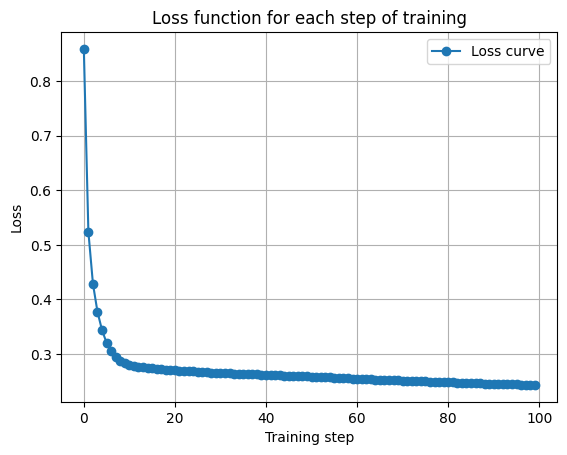

In [25]:
# Visialize how loss has changed
fig, ax = plt.subplots(figure=(30, 10))
plt.plot(losses, 'o-', label='Loss curve')
plt.title('Loss function for each step of training')
plt.xlabel('Training step')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show();

In [26]:
pred_class_probs = grid_preds[-1].exp()  # Last step of training
print(f'Class probabilities {pred_class_probs}')

pred_class = 1 * (pred_class_probs[:, 1] > 0.5)
print(f'\nPredicted classes {pred_class}')

Class probabilities tensor([[9.9529e-01, 4.7081e-03],
        [9.9465e-01, 5.3503e-03],
        [9.9392e-01, 6.0796e-03],
        ...,
        [1.2802e-07, 1.0000e+00],
        [1.0846e-07, 1.0000e+00],
        [9.1884e-08, 1.0000e+00]])

Predicted classes tensor([0, 0, 0,  ..., 1, 1, 1])


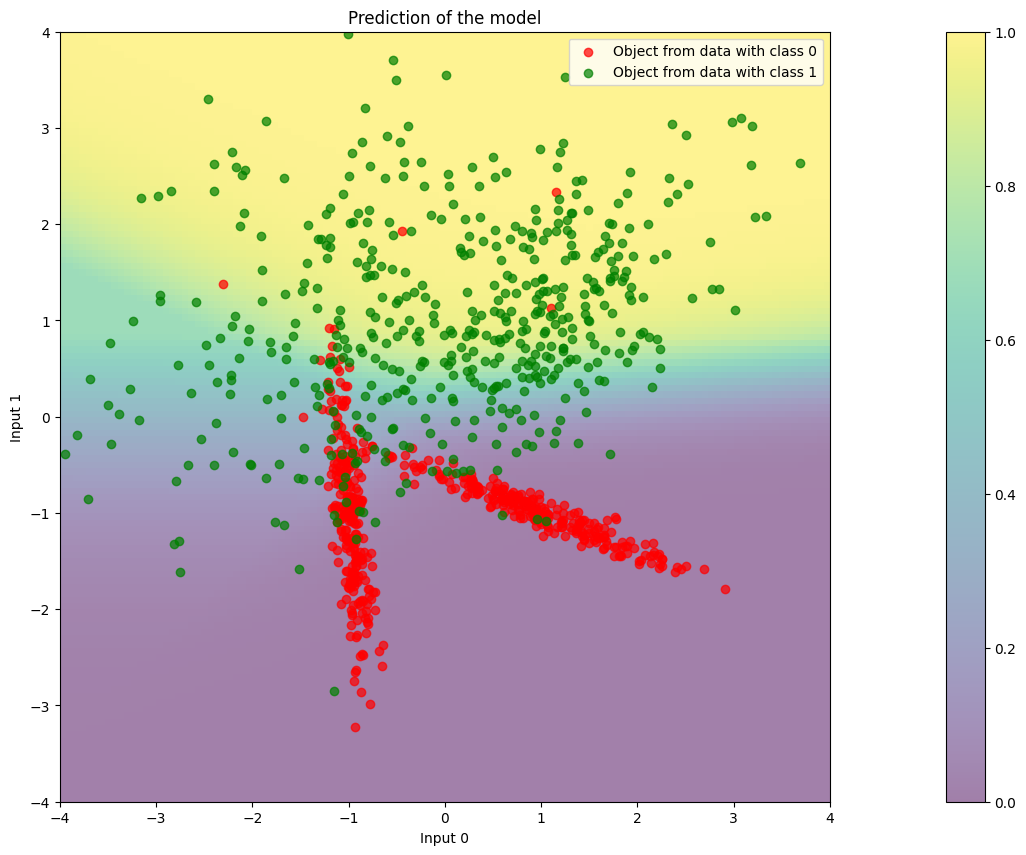

In [27]:
# Draw predictions
fig, ax = plt.subplots(figsize=(30, 10))
colors = ['red', 'green']
for target in range(2):
    plt.scatter(
        X[y == target, 0],
        X[y == target, 1],
        label=f'Object from data with class {target}',
        c=colors[target],
        alpha=0.7
    )
    
plt.imshow(
    pred_class_probs[:, 0].reshape(grid_size, grid_size).T,
    vmin=0.,
    vmax=1.,
    extent=(xy_min, xy_max, xy_min, xy_max),
    alpha=0.5
)

plt.title('Prediction of the model')
plt.xlabel('Input 0')
plt.ylabel('Input 1')
plt.legend()
plt.colorbar()
plt.show()

# Task 4

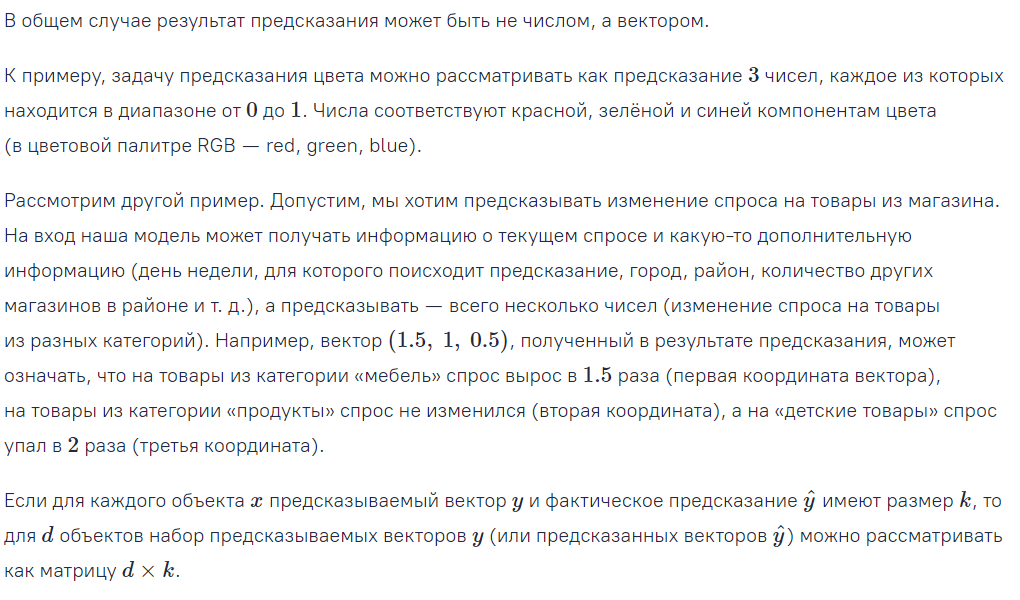
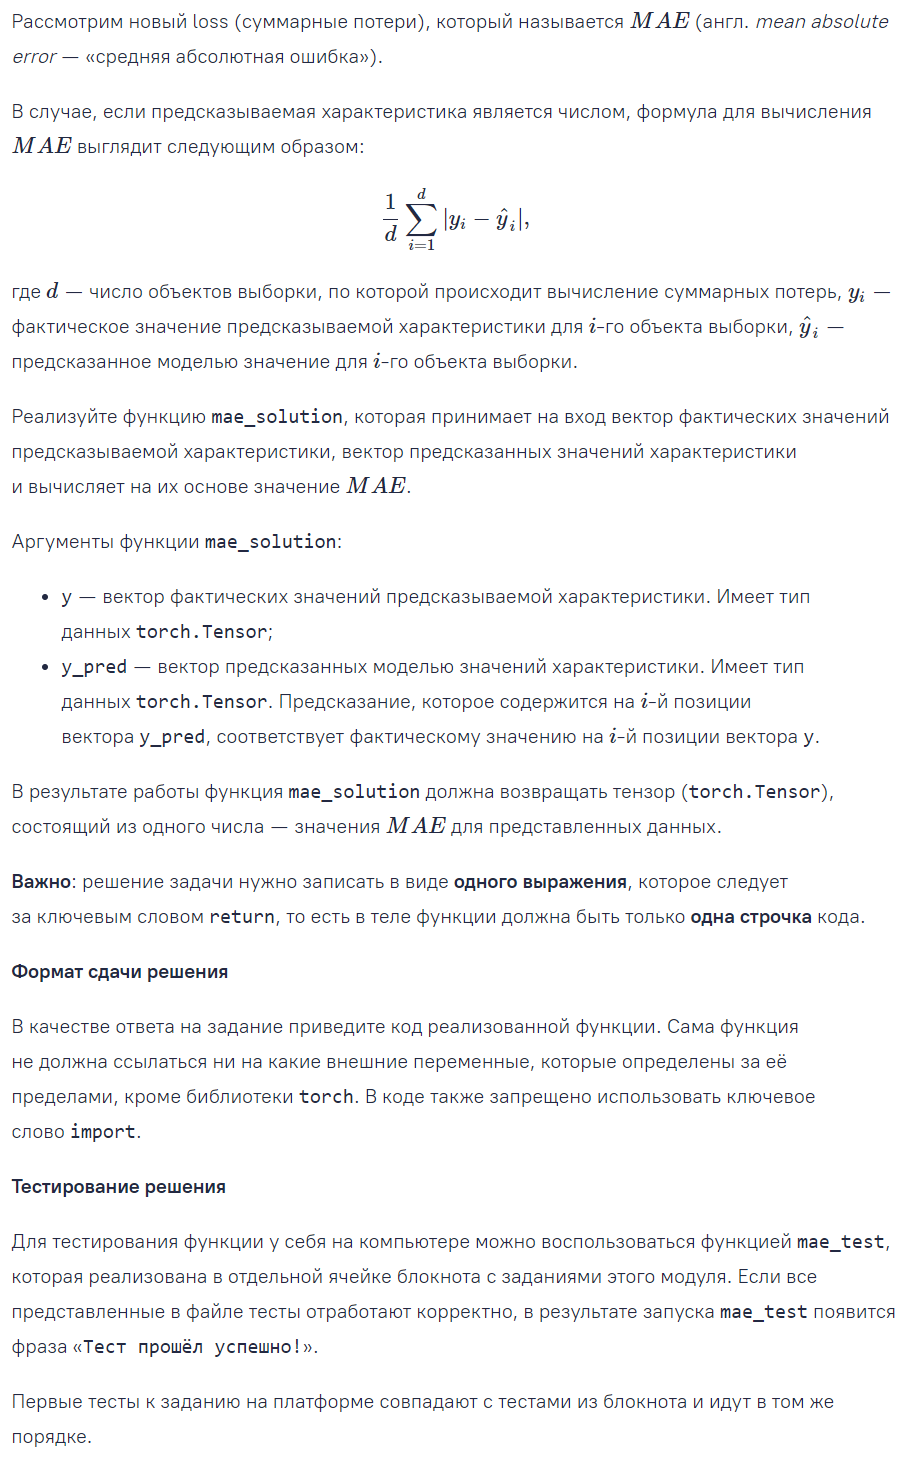

In [28]:
import torch

def mae_solution(y, y_pred):
    return torch.abs(y - y_pred).sum() / y.size(dim=0)


y_true = torch.tensor(data=[3.4, 5.7, 2.9, 3.8])
y_pred = torch.tensor(data=[2.4, 3.7, 5.9, 8.8])
mae_solution(y_true, y_pred)

tensor(2.7500)

# Task 5
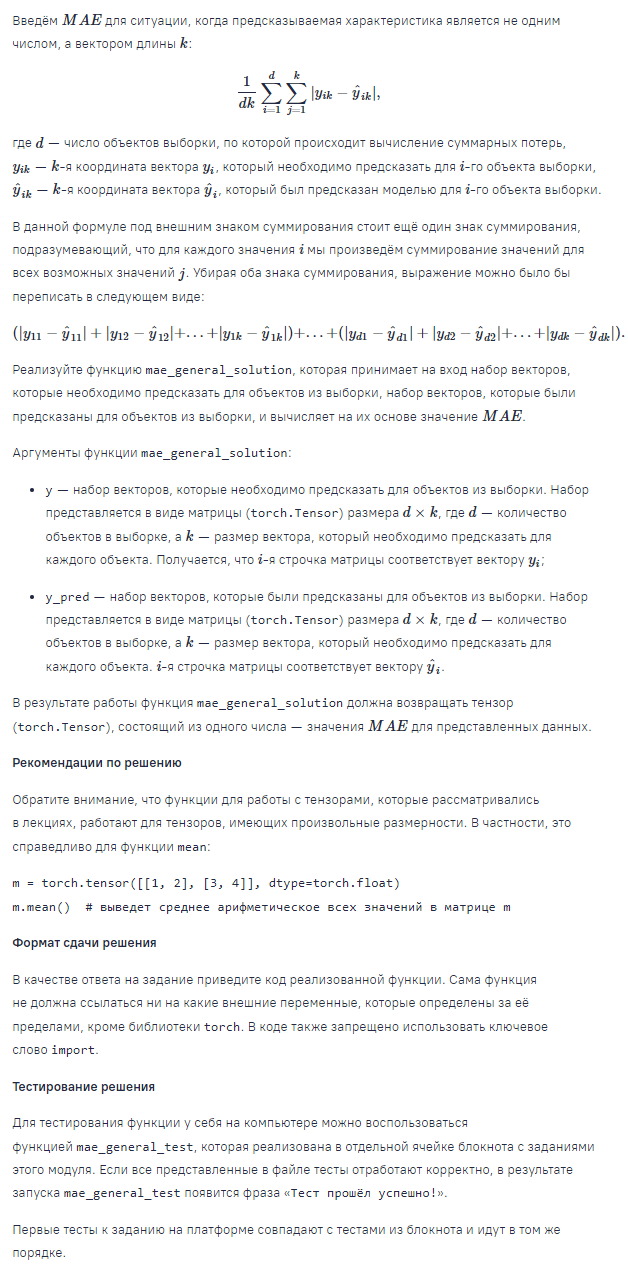

In [29]:
import torch

def mae_general_solution(y, y_pred):
    return torch.abs(y - y_pred).mean()


y_true = torch.tensor(data=[[3.4, 5.7], [2.9, 3.8]])
y_pred = torch.tensor(data=[[2.4, 3.7], [5.9, 8.8]])
mae_general_solution(y_true, y_pred)

tensor(2.7500)

# Task 6
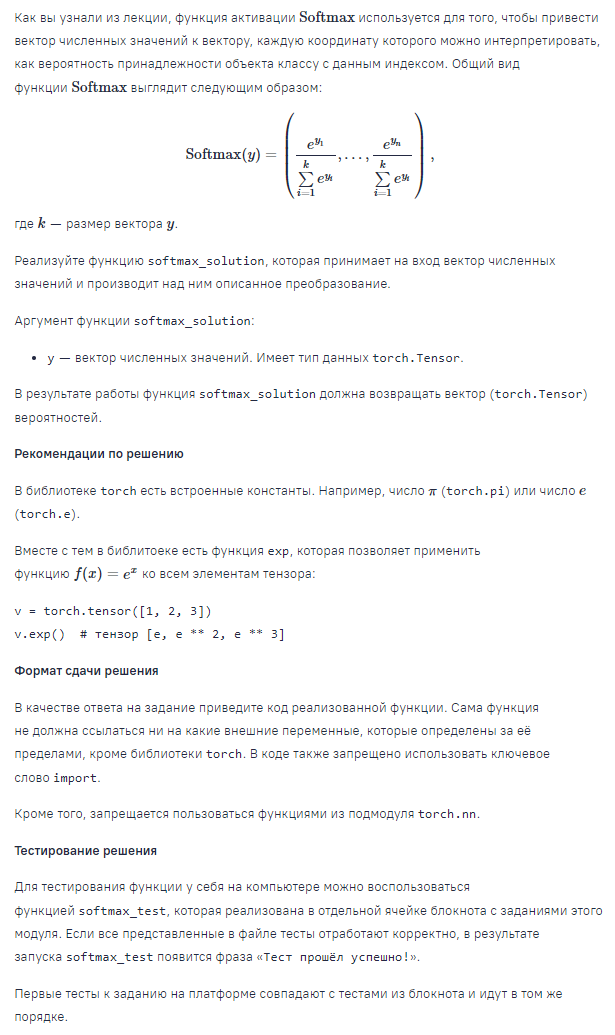

In [31]:
import torch

def softmax_solution(y):
    return torch.tensor(data=[i.exp() / y.exp().sum() for i in y])


y_pred = torch.tensor(data=[2.4, 3.7, 5.9, 8.8])
softmax_solution(y_pred)

tensor([0.0016, 0.0057, 0.0518, 0.9409])

# Task 7
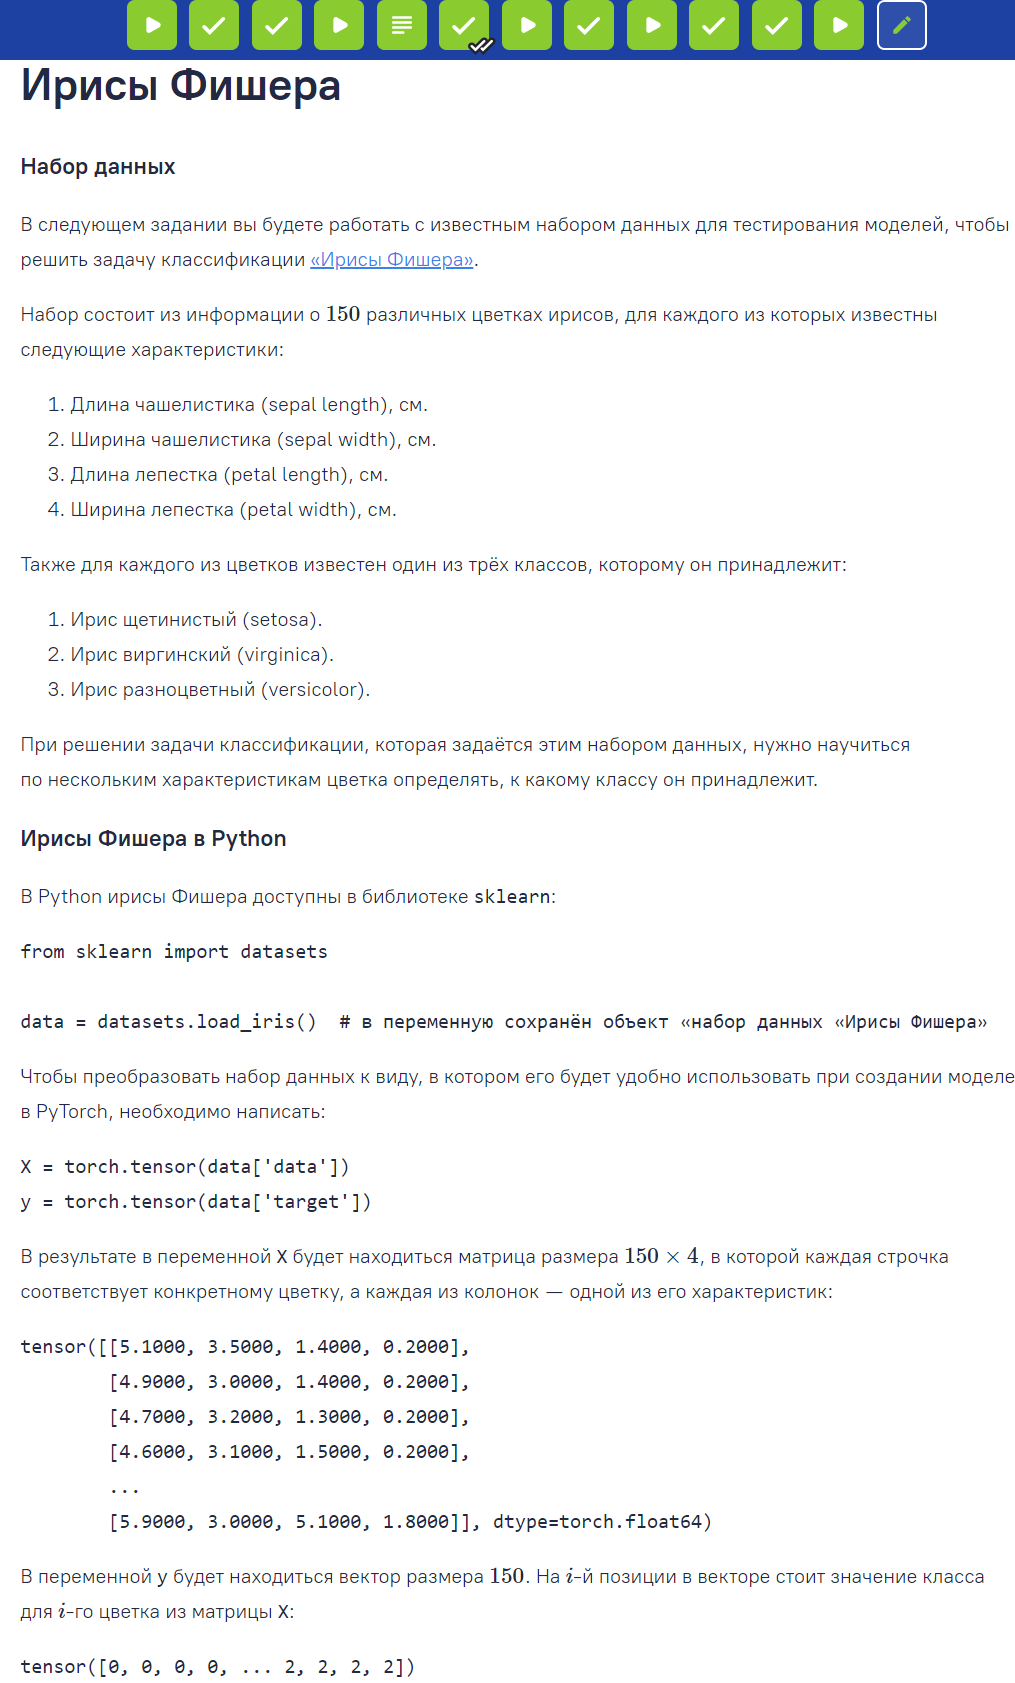

In [32]:
import sklearn
from sklearn import datasets

In [33]:
data = datasets.load_iris()
X = torch.tensor(data['data'])
y = torch.tensor(data['target'], dtype=torch.long)

In [34]:
# Create model with 3 layers
from collections import OrderedDict

model = torch.nn.Sequential(
    OrderedDict([
        ('Linear_layer_1', torch.nn.Linear(in_features=4, out_features=4)),
        ('ReLU_activation_1', torch.nn.ReLU()),
        ('Linear_layer_3', torch.nn.Linear(in_features=4, out_features=3)),
        ('Softmax_activation_3', torch.nn.LogSoftmax(dim=1))
    ])
)

model = model.to(dtype=X.dtype)
model

Sequential(
  (Linear_layer_1): Linear(in_features=4, out_features=4, bias=True)
  (ReLU_activation_1): ReLU()
  (Linear_layer_3): Linear(in_features=4, out_features=3, bias=True)
  (Softmax_activation_3): LogSoftmax(dim=1)
)

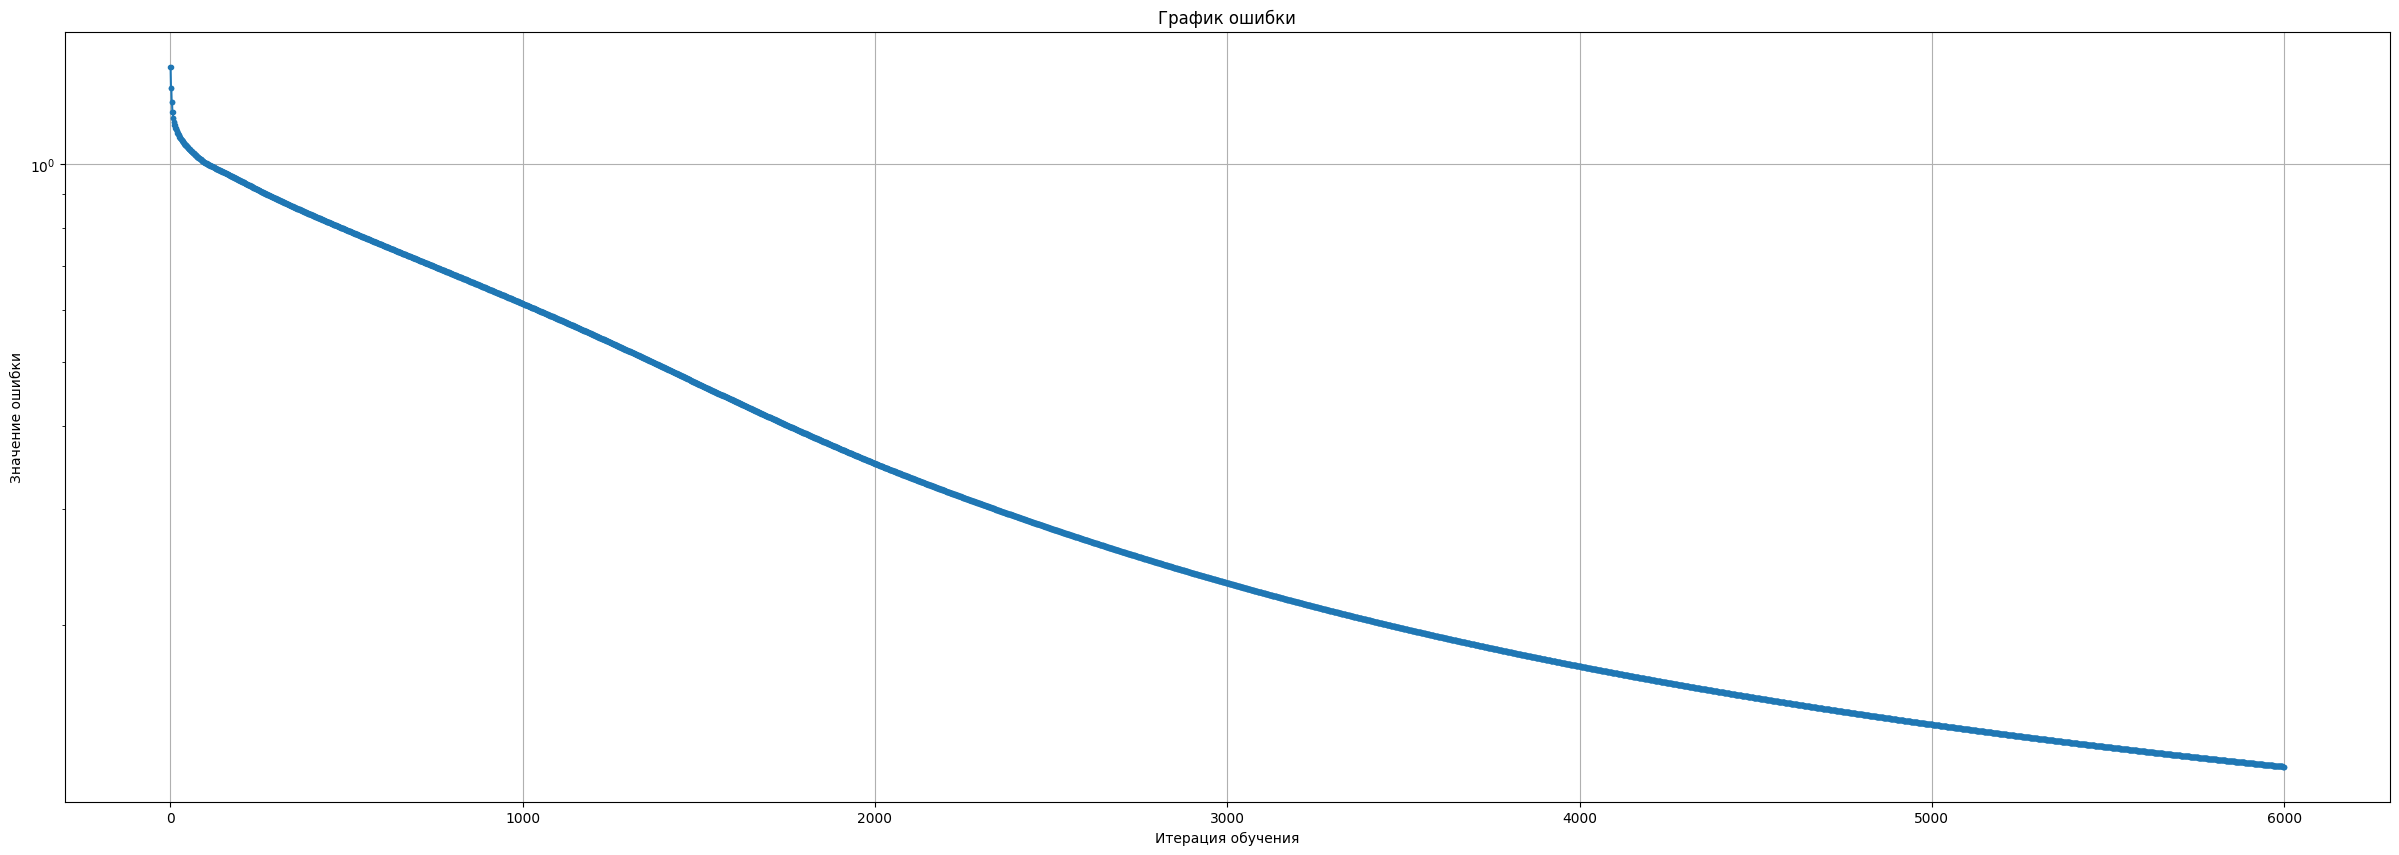

In [35]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: Подберите число итераций обучения нейронной сети.
#       Значение числа итераций стоит выбрать большим 1000.
num_epochs = 3000

# TODO: Создайте оптимизатор SGD аналогично тому, как он задавался в лекции.
#       Не забудьте передать в него model.parameters().
#       В качестве величины шага обучения (параметр lr) возьмите значение 0.01.
optimizer = torch.optim.SGD(
    model.parameters(),
    lr=0.01
)

# TODO: Задайте функцию потерь. В нашем случае это должна быть torch.nn.NLLLoss.
loss_fn = torch.nn.NLLLoss()

losses = []

for epoch in range(1, num_epochs + 1):
    # TODO: Обнулите накопленное значение градиента с помощью фукции zero_grad объекта optimizer.
    #       Замените ключевое слово pass на необходимое выражение.
    optimizer.zero_grad()
    
    # TODO: Посчитайте предсказание модели для объектов из матрицы X.
    pred = model(X)
    # TODO: Посчитайте суммарные потери для предсказанных значений из pred.
    loss = loss_fn(pred, y)
    losses.append(loss.item())
    
    # TODO: Рассчитайте градиенты loss по всем параметрам модели с помощью функции backward.
    #       Замените ключевое слово pass на необходимое выражение.
    loss.backward()

    # TODO: Произведите шаг оптимизации с помощью функции step объекта optimizer.
    #       Замените ключевое слово pass на необходимое выражение.
    optimizer.step()
    
    losses.append(loss.item())
    
    if epoch % 100 == 0:
        clear_output(True)
        fig, ax = plt.subplots(figsize=(30, 10))
        plt.title("График ошибки")
        plt.plot(losses, ".-")
        plt.xlabel("Итерация обучения")
        plt.ylabel("Значение ошибки")
        plt.yscale("log")
        plt.grid()
        plt.show()

In [36]:
# Тестовые данные, которые нужны для проверки корректности решения.
test_data = torch.tensor(
    [[6.1925, 2.8127, 4.8053, 1.8340],
     [6.3122, 3.3084, 4.6696, 1.5903],
     [6.4308, 2.7846, 5.6049, 2.0857],
     [6.1065, 2.7853, 3.9796, 1.3208],
     [5.1890, 4.1195, 1.4894, 0.1041],
     [6.4091, 2.7052, 5.3171, 1.9026],
     [5.4741, 3.5095, 1.3004, 0.1830],
     [6.7288, 3.0913, 4.7038, 1.4960],
     [5.0875, 3.5243, 1.4057, 0.3117],
     [5.3994, 3.8903, 1.7050, 0.4009],
     [5.6904, 4.3916, 1.4684, 0.3964],
     [4.9079, 3.0955, 1.4920, 0.1092],
     [7.7159, 3.8090, 6.7016, 2.2142],
     [4.8113, 3.0182, 1.3959, 0.2815],
     [6.4310, 3.2257, 5.2900, 2.3065],
     [6.9995, 3.1955, 4.7015, 1.3973],
     [5.6823, 2.9997, 4.2251, 1.2014],
     [5.5815, 2.7192, 4.1900, 1.2832],
     [5.9034, 3.1997, 4.7991, 1.8313],
     [5.7005, 2.6195, 3.4773, 0.9757],
     [4.9751, 3.5004, 1.3134, 0.2750],
     [6.0946, 2.9318, 4.6946, 1.3818],
     [5.0014, 3.2270, 1.1918, 0.2007],
     [5.8717, 3.0227, 4.2037, 1.5053],
     [5.2060, 3.4223, 1.3902, 0.2009],
     [4.3859, 3.2013, 1.3159, 0.2079],
     [7.3128, 2.8799, 6.3334, 1.8338],
     [6.7187, 3.1061, 5.5931, 2.4143],
     [6.6812, 3.0036, 4.9912, 1.7009],
     [7.1003, 2.9924, 5.8891, 2.0872],
     [4.9905, 2.2989, 3.3021, 0.9962],
     [6.2052, 3.4357, 5.4059, 2.2973],
     [4.4913, 2.2953, 1.3294, 0.3075],
     [7.9164, 3.7958, 6.4071, 1.9915],
     [4.9946, 3.5099, 1.6099, 0.6029],
     [6.9187, 3.1006, 5.4146, 2.0737],
     [6.7196, 3.1102, 4.4057, 1.3974],
     [6.3969, 2.8016, 5.5884, 2.1988],
     [5.1093, 2.5149, 3.0349, 1.0820],
     [5.0814, 3.3899, 1.5106, 0.2116],
     [5.5119, 4.2125, 1.4162, 0.2252],
     [6.5873, 2.8985, 4.6158, 1.3120],
     [6.7868, 2.7933, 4.8130, 1.4186],
     [5.7971, 2.6743, 3.8844, 1.1489],
     [6.4954, 3.1968, 5.0977, 2.0127],
     [6.3132, 2.5050, 4.8871, 1.4825],
     [4.9923, 3.3990, 1.4873, 0.1776],
     [5.8016, 2.6736, 5.1037, 1.8772],
     [6.5899, 3.0080, 4.4031, 1.4098],
     [6.7034, 3.2995, 5.6906, 2.5213],
     [5.5726, 2.5027, 3.9056, 1.1082],
     [4.6110, 3.1552, 1.4819, 0.2269],
     [5.3962, 3.7292, 1.5056, 0.1840],
     [4.6978, 3.1884, 1.2872, 0.2045],
     [7.7259, 2.6203, 6.9175, 2.2707],
     [4.9117, 3.5911, 1.3559, 0.1051],
     [5.5060, 2.4992, 3.9971, 1.2857],
     [6.0250, 2.2070, 3.9895, 0.9892],
     [6.2824, 2.7039, 4.8852, 1.7950],
     [6.5009, 2.9797, 5.4999, 1.8144],
     [5.7074, 2.7965, 4.0783, 1.3030],
     [7.1991, 3.0009, 5.7894, 1.5942],
     [5.4843, 2.3981, 3.6846, 0.9985],
     [5.9921, 2.9082, 4.4937, 1.5119],
     [5.7057, 2.8921, 4.1759, 1.3012],
     [4.9960, 3.3127, 1.3778, 0.1983],
     [7.3930, 2.8093, 6.1120, 1.9125],
     [4.8980, 3.0966, 1.5072, 0.2077],
     [5.7947, 2.6964, 4.0938, 0.9683],
     [5.5206, 2.4189, 3.8104, 1.0849],
     [6.3227, 3.3981, 5.6103, 2.4238],
     [5.3746, 3.4166, 1.5101, 0.4062],
     [7.7002, 3.0019, 6.1238, 2.3163],
     [7.6668, 2.7952, 6.6920, 2.0174],
     [5.7909, 2.7058, 5.1240, 1.8787],
     [4.8202, 3.4038, 1.9038, 0.1706],
     [4.6180, 3.3850, 1.3792, 0.2890],
     [6.0207, 3.3968, 4.4946, 1.5936],
     [6.7062, 2.5106, 5.7983, 1.7929],
     [7.1862, 3.1946, 6.0065, 1.8011],
     [6.9320, 3.1704, 5.6946, 2.3006],
     [5.0794, 3.5046, 1.3968, 0.1867],
     [5.4282, 2.9711, 4.5280, 1.5053],
     [6.2885, 2.8019, 5.0646, 1.5129],
     [6.1996, 2.9017, 4.2869, 1.3103],
     [6.9157, 3.0832, 5.0973, 2.3123],
     [5.5830, 2.7712, 4.9095, 1.9998],
     [4.5919, 3.5793, 0.9960, 0.1591],
     [6.4994, 2.9805, 5.7897, 2.1949],
     [5.6909, 3.8175, 1.7168, 0.3178],
     [4.7868, 3.0152, 1.3686, 0.0763],
     [5.7133, 2.5093, 4.9902, 1.9970],
     [5.7222, 2.7908, 4.4754, 1.2860],
     [5.8094, 2.5860, 3.9722, 1.1959],
     [6.7882, 3.0047, 5.4856, 2.0806],
     [4.9022, 3.0257, 1.3815, 0.2020],
     [6.7021, 3.3029, 5.7350, 2.1114],
     [4.3860, 2.8866, 1.4093, 0.1907],
     [6.1990, 2.2013, 4.4786, 1.5149],
     [5.8978, 3.0139, 5.1014, 1.8140],
     [6.1015, 2.9760, 4.6244, 1.4117],
     [6.1213, 2.9865, 4.9206, 1.7828],
     [5.0933, 3.8093, 1.5047, 0.3021],
     [6.0865, 2.8123, 4.7077, 1.2249],
     [7.6094, 2.9810, 6.6075, 2.0891],
     [6.3063, 3.2640, 5.9935, 2.4758],
     [5.6007, 3.0030, 4.0734, 1.2912],
     [4.6801, 3.1838, 1.5982, 0.1884],
     [4.8895, 2.4996, 4.5087, 1.7239],
     [5.8046, 2.7879, 5.0710, 2.3901],
     [6.0216, 3.0023, 4.7838, 1.8201],
     [6.5022, 2.8065, 4.6073, 1.4858],
     [7.1887, 3.6003, 6.0947, 2.4976],
     [6.9059, 3.0827, 4.8975, 1.5047],
     [4.9918, 3.3971, 1.5863, 0.3994],
     [6.7818, 3.2047, 5.8888, 2.3061],
     [5.0897, 3.6993, 1.5022, 0.4099],
     [6.3094, 2.2760, 4.3909, 1.2844],
     [4.7939, 3.3883, 1.6162, 0.1956],
     [5.1004, 3.3099, 1.6809, 0.4906],
     [4.6038, 3.1900, 1.4267, 0.2038],
     [6.4056, 3.0822, 5.4876, 1.7860],
     [4.7875, 3.0931, 1.5968, 0.2039],
     [5.2887, 3.6922, 1.5052, 0.1877],
     [5.1729, 2.6834, 3.8810, 1.3679],
     [5.6013, 2.9898, 4.4625, 1.5142],
     [6.0093, 2.1654, 4.9892, 1.5131],
     [4.9704, 3.6133, 1.4107, 0.1914],
     [6.0135, 2.6794, 5.1117, 1.5889],
     [4.9013, 2.4039, 3.3006, 0.9957],
     [6.2933, 2.8898, 5.6077, 1.7835],
     [6.1177, 2.5915, 5.6039, 1.3830],
     [4.3163, 3.0072, 1.1065, 0.0893],
     [5.0958, 3.7942, 1.9179, 0.3851],
     [5.1961, 3.4681, 1.5010, 0.1978],
     [6.4864, 2.9841, 5.2081, 2.0097],
     [6.2862, 2.5160, 4.9928, 1.9029],
     [5.3791, 3.4206, 1.7202, 0.2003],
     [6.7209, 2.9944, 5.2160, 2.3220],
     [5.4871, 2.3214, 4.0096, 1.3024],
     [6.4028, 3.1972, 4.5295, 1.4939],
     [5.0231, 2.9747, 1.6009, 0.2373],
     [4.9869, 1.9933, 3.5222, 1.0113],
     [5.0910, 3.8294, 1.5923, 0.2157],
     [4.4141, 3.0291, 1.2948, 0.1959],
     [6.3924, 2.8996, 4.2981, 1.2741],
     [5.3970, 3.8881, 1.3111, 0.3878],
     [5.5865, 2.8803, 3.5829, 1.3133],
     [5.8151, 3.9625, 1.1992, 0.1796],
     [5.5356, 2.6235, 4.3694, 1.1910]], dtype=torch.float64)

In [37]:
# Модель для каждого объекта из тестовых данных возвращает вектор из 3-х численных значений,
# каждое из которых является логарифмом вероятности принадлежности объекта конкретному классу.
log_probs = model(test_data)

# Чтобы получить не логарифмы вероятностей, а сами вероятности,
# нужно поэлементно возвести экспоненту в степень логарифмов вероятности.
pred_class_probs = log_probs.exp()

# Для того чтобы понять, к какому классу модель отнесла тот или иной объект,
# нужно понять, какая координата соответствующего вектора предсказанных веряотностей имеет
# наибольшее значение. То есть к какому классу с точки зрения модели объект
# относится с наибольшей вероятностью.
# Чтобы выбрать номер координаты с наибольшим значением
# в каждой строчке матрицы log_probs, воспользуемся функцией torch.argmax.
# Значение ключевого парамтера dim указывает на то, что мы ищем наибольшее
# значение именно в каждой строчке.
pred_class = torch.argmax(log_probs, dim=1)

In [38]:
def to_list(x, precision=2):
    return [round(x, precision) for x in x.tolist()]

print(to_list(pred_class))

[2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 0, 0, 1, 1, 1, 2, 2, 0, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 0, 1, 1, 1, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 1, 1, 2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1]
